In [101]:
# Importing the dependancies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## DataSetLink = https://www.kaggle.com/datasets/ninzaami/loan-predication

In [44]:
#Data collection ans processing
df = pd.read_csv('loan.csv')

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
df = df.dropna()

In [58]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [60]:
df.shape

(480, 13)

In [64]:
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [66]:
df.replace({"Loan_Status":{0:"Loan_Denied",1:"Loan_Approved"}},inplace=True)

In [67]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Loan_Denied
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Loan_Approved
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Loan_Approved
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Loan_Approved
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Loan_Approved


In [68]:
df.shape

(480, 13)

In [70]:
#Depedent column and values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [71]:
# replacing the value pf 3+ to 4
df = df.replace(to_replace='3+',value=4)

In [72]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot: >

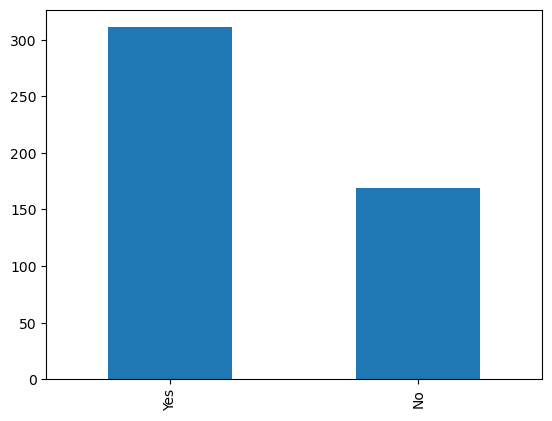

In [79]:
# Data Visualiaztion
df['Married'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Education', ylabel='count'>

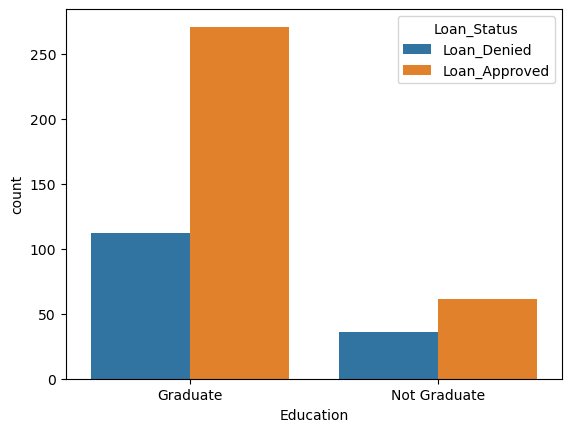

In [80]:
#educational loan status
sns.countplot(x="Education",hue="Loan_Status",data=df)

<AxesSubplot: xlabel='Married', ylabel='count'>

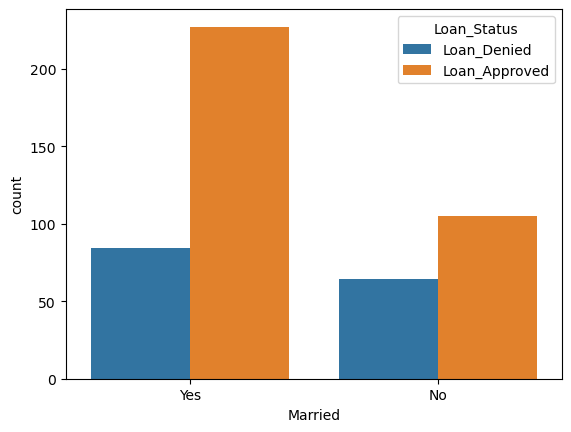

In [81]:
#marital status and loan status
sns.countplot(x="Married",hue="Loan_Status",data=df)

In [83]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,Loan_Denied
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Loan_Approved
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Loan_Approved
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Loan_Approved
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Loan_Approved


In [86]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [87]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [89]:
Y

1        Loan_Denied
2      Loan_Approved
3      Loan_Approved
4      Loan_Approved
5      Loan_Approved
           ...      
609    Loan_Approved
610    Loan_Approved
611    Loan_Approved
612    Loan_Approved
613      Loan_Denied
Name: Loan_Status, Length: 480, dtype: object

## Train Test Split

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [93]:
X_train,X_test,Y_train,Y_test

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 354       0        1          0          1              0             2423   
 369       1        1          0          1              0            19730   
 244       1        1          0          0              0             3406   
 262       0        0          1          1              0             3481   
 39        1        0          0          0              0             3748   
 ..      ...      ...        ...        ...            ...              ...   
 312       0        0          0          1              0             2507   
 40        1        0          0          1              0             3600   
 233       0        0          0          1              0             8333   
 349       1        1          0          1              0             2625   
 353       0        1          0          1              1             5500   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [98]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training the model SVM

In [99]:
classifier = svm.SVC(kernel='linear')

In [100]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

In [103]:
# accuracy score in training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [104]:
print("Accuracy Score: ",training_data_accuracy )

Accuracy Score:  0.7986111111111112


In [105]:
# accuracy score in test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [106]:
print("Accuracy Score: ",test_data_accuracy )

Accuracy Score:  0.7708333333333334


## Predictive System

In [116]:
X_new = X_test[:6]
prediction = classifier.predict(X_new)
print(prediction)

['Loan_Approved' 'Loan_Approved' 'Loan_Approved' 'Loan_Approved'
 'Loan_Denied' 'Loan_Approved']
